In [1]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch


2025-04-21 12:58:09.082540: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745240289.262651      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745240289.318791      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#!pip install diffusers accelerate

In [2]:
model_id1='dreamlike-art/dreamlike-diffusion-1.0'
model_id2='stabilityai/stable-diffusion-xl-base-1.0'

In [3]:
pipe=StableDiffusionPipeline.from_pretrained(model_id1,torch_dtype=torch.float16,use_safetensors=True)
pipe=pipe.to("cuda")

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [11]:
prompt="""dreamlikeart, a beautiful hijabi moroccan woman """

In [12]:
image=pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

(-0.5, 639.5, 639.5, -0.5)

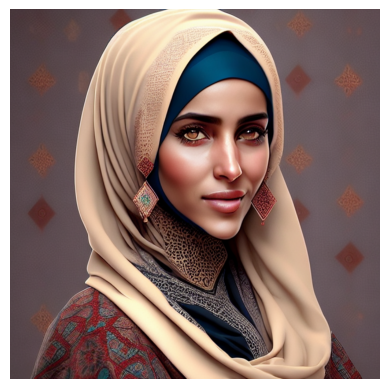

In [13]:
plt.imshow(image)
plt.axis('off')

In [ ]:
##mm yeah kinda good ! __!

In [16]:
from diffusers import StableDiffusionXLPipeline

pipe2=StableDiffusionXLPipeline.from_pretrained(model_id2,torch_dtype=torch.float16,use_safetensors=True)
pipe2=pipe2.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [17]:
image2=pipe2(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

(-0.5, 1023.5, 1023.5, -0.5)

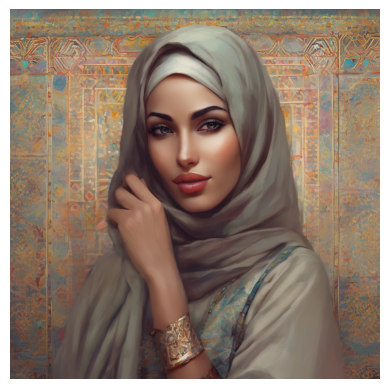

In [18]:
plt.imshow(image2)
plt.axis('off')

**WORKING WITH STABLE DIFFUSION PARAMETRS**
NEGATIVE PROMPTING 
HEIGHT 
WEIGHT
NUM_IMAGES_PER_PROMPT...

In [22]:
def generate_image(pipe,prompt,params):
    img=pipe(prompt,**params).images
    num_images=len(img)

    if num_images>1:
        fig,ax=plt.subplots(nrow=1,ncols=num_images)
        for i in range(num_images):
            ax[i].imshow(img[i])
            ax[i].axis('off')
    else:
        
        fig=plt.figure()
        plt.imshow(img[0])
        plt.axis('off')
    plt.tight_layout()
            
    



In [24]:
params={'num_inference_steps':100,'width':512,'height':int(1.5*640),'negative_prompt':"ugly women,low quality"}

  0%|          | 0/100 [00:00<?, ?it/s]

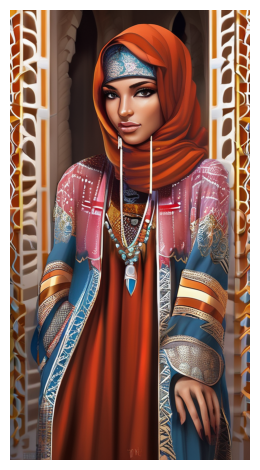

In [25]:
generate_image(pipe2,prompt,params)